## Medical_Cost_Regreession_Problem

Predicting the medical cost based on som independent variables using the [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv) dataset from Kaggle

### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Preparation

In [2]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'

In [3]:
data = pd.read_csv(url)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

### Converting some columns in one_hot_encoded_vects
* **sex** - should be converted to number
* **smoker column** - should be converted to one hot encording
* **region** - should be converted to one hot 

In [6]:
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### Target and features extraction

In [7]:
y = data_one_hot['charges'].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [8]:
X = data_one_hot.drop(['charges'], axis=1).values
X

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

> Data Splitting

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X.shape

(1338, 11)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size= .2)

X_train.shape, X_test.shape, y_test.shape, y_train.shape

((1070, 11), (268, 11), (268,), (1070,))

> Converting numpy array to tensors

In [12]:
X_train_tensors = tf.cast(tf.convert_to_tensor(X_train), dtype=tf.float32)
X_test_tensors = tf.cast(tf.convert_to_tensor(X_test), dtype=tf.float32)

y_train_tensors = tf.cast(tf.convert_to_tensor(y_train), dtype=tf.float32)
y_test_tensors = tf.cast(tf.convert_to_tensor(y_test), dtype=tf.float32)

X_train_tensors, y_train_tensors

(<tf.Tensor: shape=(1070, 11), dtype=float32, numpy=
 array([[38.   , 30.21 ,  3.   , ...,  1.   ,  0.   ,  0.   ],
        [54.   , 39.6  ,  1.   , ...,  0.   ,  0.   ,  1.   ],
        [39.   , 32.8  ,  0.   , ...,  0.   ,  0.   ,  1.   ],
        ...,
        [52.   , 30.2  ,  1.   , ...,  0.   ,  0.   ,  1.   ],
        [19.   , 37.43 ,  0.   , ...,  1.   ,  0.   ,  0.   ],
        [55.   , 35.245,  1.   , ...,  0.   ,  0.   ,  0.   ]],
       dtype=float32)>,
 <tf.Tensor: shape=(1070,), dtype=float32, numpy=
 array([ 7537.164 , 10450.552 ,  5649.715 , ...,  9724.53  ,  2138.0708,
        11394.065 ], dtype=float32)>)

#### Model Creation

In [13]:
input_shape = X_train_tensors.shape
input_shape[1]

11

In [14]:
model = keras.Sequential([
      keras.layers.Dense(16, activation='relu',kernel_initializer='normal', input_shape=(11, ),),
      keras.layers.Dense(1, kernel_initializer='normal')
])

In [15]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae'],
    loss='mae'
)

In [16]:
EPOCHS = 100
BATCH_SIZE = 64
VERBOSE =1
VAL_SPLIT =.2

history = model.fit(X_train_tensors, y_train_tensors, BATCH_SIZE, EPOCHS, VERBOSE, validation_split=VAL_SPLIT)

Epoch 1/100
14/14 [==============================] - 4s 159ms/step - loss: 13578.0426 - mae: 13578.0426 - val_loss: 14531.4951 - val_mae: 14531.4951
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 13083.2909 - mae: 13083.2909 - val_loss: 14505.0713 - val_mae: 14505.0713
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 13122.6271 - mae: 13122.6271 - val_loss: 14450.5020 - val_mae: 14450.5020
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 13186.3160 - mae: 13186.3160 - val_loss: 14361.6377 - val_mae: 14361.6377
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 12143.7424 - mae: 12143.7424 - val_loss: 14234.6475 - val_mae: 14234.6475
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 12676.8958 - mae: 12676.8958 - val_loss: 14067.5605 - val_mae: 14067.5605
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 12423.8048 - mae: 12423.8048 - val_loss: 13

14/14 [==============================] - 0s 6ms/step - loss: 7052.1168 - mae: 7052.1168 - val_loss: 8166.6787 - val_mae: 8166.6787
Epoch 58/100
14/14 [==============================] - 0s 6ms/step - loss: 7370.3330 - mae: 7370.3330 - val_loss: 8158.1470 - val_mae: 8158.1470
Epoch 59/100
14/14 [==============================] - 0s 6ms/step - loss: 6836.7967 - mae: 6836.7967 - val_loss: 8149.3071 - val_mae: 8149.3071
Epoch 60/100
14/14 [==============================] - 0s 6ms/step - loss: 7273.5883 - mae: 7273.5883 - val_loss: 8143.0107 - val_mae: 8143.0107
Epoch 61/100
14/14 [==============================] - 0s 7ms/step - loss: 7069.3326 - mae: 7069.3326 - val_loss: 8134.5161 - val_mae: 8134.5161
Epoch 62/100
14/14 [==============================] - 0s 6ms/step - loss: 6765.6610 - mae: 6765.6610 - val_loss: 8130.4072 - val_mae: 8130.4072
Epoch 63/100
14/14 [==============================] - 0s 6ms/step - loss: 6760.9774 - mae: 6760.9774 - val_loss: 8118.3364 - val_mae: 8118.3364
Epoch

### Evaluating the Model

In [17]:
model.evaluate(X_test_tensors, y_test_tensors, verbose=1)

9/9 [==============================] - 0s 2ms/step - loss: 6092.6567 - mae: 6092.6567


[6092.65673828125, 6092.65673828125]

### Getting the model summary

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


### Making Predictions

In [19]:
model.predict(X_test_tensors[:2]), y_test_tensors[:2]

(array([[3171.455 ],
        [3622.7678]], dtype=float32),
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 1136.3994, 24059.68  ], dtype=float32)>)

### Plotting the Model History

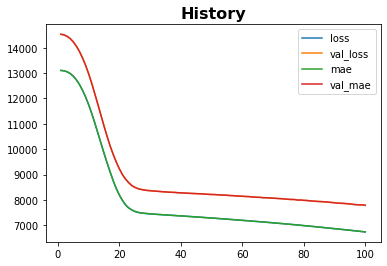

In [20]:
def plotHistory(history):
    x = tf.constant([i+1 for i in range(EPOCHS)])
    
    plt.title("History", fontsize=16, fontweight='bold')
    plt.plot(x, history["loss"], label='loss')
    plt.plot(x, history["val_loss"], label='val_loss')
    
    plt.plot(x, history["mae"], label='mae')
    plt.plot(x, history["val_mae"], label='val_mae')
    
    plt.legend()
    plt.show()
plotHistory(history.history)

### Downloading the notebook

In [85]:
from google.colab import files

files.download('__path__')